### adapt from examples: 

https://statics.teams.cdn.office.net/evergreen-assets/safelinks/1/atp-safelinks.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as anim
from IPython.display import HTML
from pathlib import Path

def change_font_size(size):
    from matplotlib import pylab
    params = {'legend.fontsize': size,
             'axes.labelsize': size,
             'axes.titlesize':size,
             'xtick.labelsize':size,
             'ytick.labelsize':size,
             }
    pylab.rcParams.update(params)
    
    
# %matplotlib ipympl

# travelling sin waves

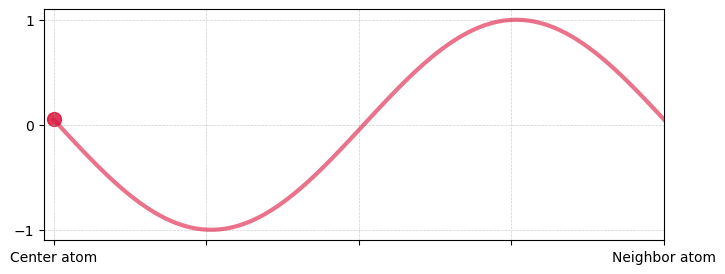

In [12]:
f = lambda x: np.sin(x)
x = np.linspace(-np.pi, np.pi, 100)
y = f(x)

fig, ax = plt.subplots(figsize=(8, 3))
wave, = ax.plot(x, y, "-", color="crimson", lw=3, alpha = 0.6)

# Initialize the scatter point at the first x position
scatter = ax.scatter([x[0]], [y[0]], color="crimson", s=100, alpha = 0.85)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["Center atom", None, None, None, "Neighbor atom"])

ax.set_yticks((-1, 0, 1))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
ax.set_xlim(-np.pi-0.1, np.pi)

def shift(t, c=1):
    # Update the y data of the sine wave
    new_y = f(x - c*t)
    wave.set_ydata(new_y)
    
    # Calculate the new position for the scatter point
    new_x = x[0] - c*t
    new_y_scatter = f(new_x)
    scatter.set_offsets([x[0], new_y_scatter])
    
    return wave, scatter  # Return both the line and the scatter

ani = anim.FuncAnimation(fig, shift, frames=190, 
                         fargs=(0.1,),
                         interval=30, blit=True)

# Save animation
ani.save('00_sine_wave_animation.gif', writer='pillow', fps=30)

# sin waves changing frequency

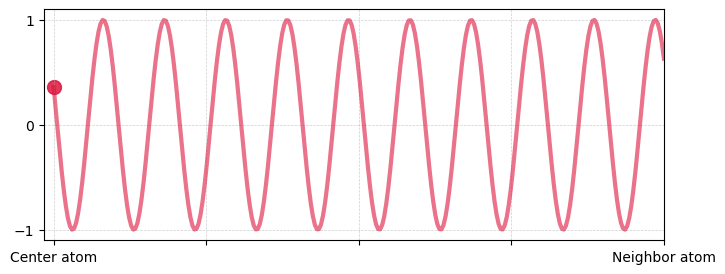

In [9]:
# Define the sine function with time-dependent frequency
f = lambda x, t, base_freq=1: np.sin(base_freq * (x - t))

x = np.linspace(-np.pi, np.pi, 300)
y = f(x, 0)

fig, ax = plt.subplots(figsize=(8, 3))
wave, = ax.plot(x, y, "-", color="crimson", lw=3, alpha=0.6)

# Initialize the scatter point at the first x position
scatter = ax.scatter([x[0]], [y[0]], color="crimson", s=100, alpha=0.85)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["Center atom", None, None, None, "Neighbor atom"])

ax.set_yticks((-1, 0, 1))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
ax.set_xlim(-np.pi-0.1, np.pi)

def shift(t, c=1):
    # Time-dependent frequency
    current_freq = 0.5 + 0.05 * t  # Adjust this multiplier to change how quickly the frequency changes
    
    # Update the y data of the sine wave with changing frequency
    new_y = f(x, t=1, base_freq=current_freq)
    wave.set_ydata(new_y)
    
    # Calculate the new position for the scatter point
    new_x = x[0]
    new_y_scatter = new_y[0]
    scatter.set_offsets([new_x, new_y_scatter])
    
    return wave, scatter  # Return both the line and the scatter

ani = anim.FuncAnimation(fig, shift, frames=190, 
                         fargs=(0.1,),
                         interval=30, blit=True)

# Save the animation to a GIF
ani.save('01_sine_wave_animation_with_changing_frequency.gif', writer='pillow', fps=30)

# standard XAFS

In [2]:
Pd_standard = np.loadtxt('Pd_foil_standard_example_XANES_EXAFS/Pd_K_standard.dat.nor')
Pd_R = np.loadtxt('Pd_foil_standard_example_XANES_EXAFS/marked.chir_mag')
Pd_K = np.loadtxt('Pd_foil_standard_example_XANES_EXAFS/marked.chik2')

fit = np.loadtxt('Pd_foil_standard_example_XANES_EXAFS/Pd_K_standard.dat.rmag')
fit_k = np.loadtxt('Pd_foil_standard_example_XANES_EXAFS/Pd_K_standard.dat.k2')

190


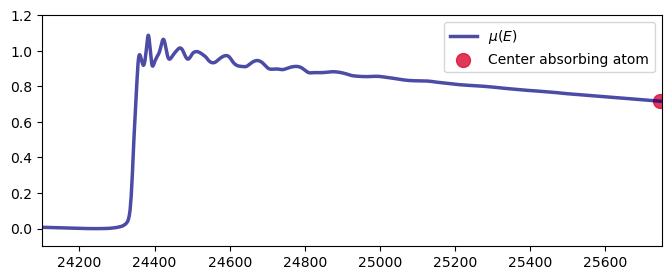

In [8]:
fig = plt.figure(figsize=(8,3))
# change_font_size(10)
# Interpolate the spectrum to evenly spaced energies
x_interpolated = np.linspace(24360, 25750, 570)
y_interpolated = np.interp(x_interpolated, Pd_standard[:, 0], Pd_standard[:, 1])

plt.plot(Pd_standard[:, 0], Pd_standard[:, 1], color='navy', linewidth=2.5, alpha=0.7)
# plt.plot(x_interpolated, y_interpolated, color='navy', linewidth=2.5, alpha=0.7)
scatter = plt.scatter(x_interpolated[0], y_interpolated[0], color="crimson", s=100, alpha=0.85)

plt.ylim(-0.1, 1.2)
plt.xlim(24100, 25750)
plt.legend(['$\mu(E)$', 'Center absorbing atom'])

def shift(t):
    new_x = x_interpolated[t]
    new_y = y_interpolated[t]
    scatter.set_offsets([new_x, new_y])
    return scatter, 

# Set up the animation
frames = np.arange(0, len(x_interpolated), 3)
print(len(frames))
ani = anim.FuncAnimation(fig, shift, frames=frames,
                         interval=30, blit=True)

# Save the animation to a GIF
ani.save('01_spectrum_animation.gif', writer='pillow', fps=30)

# K_range not used for now

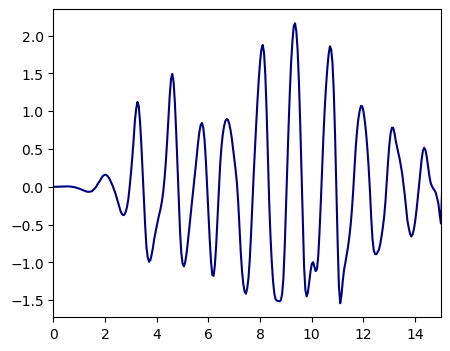

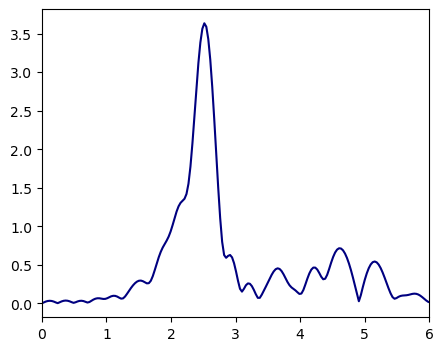

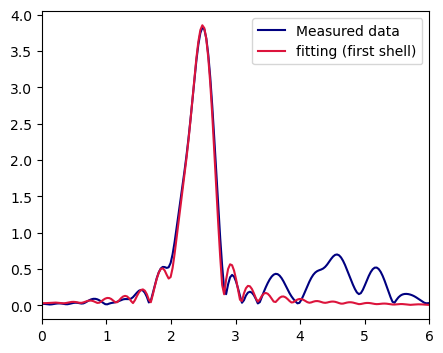

In [13]:
plt.figure(figsize = (5,4))
plt.plot(Pd_K[:,0], Pd_K[:,2], color = 'navy')

#plt.ylim(-0.1, 1.2)
plt.xlim(0,15)

#plt.xlabel('X-ray Energy [eV]')
plt.savefig('Pd_K.jpg', dpi = 300)

#%%
plt.figure(figsize = (5,4))
plt.plot(Pd_R[:,0], Pd_R[:,1], color = 'navy')


#plt.ylim(-0.1, 1.2)
plt.xlim(0,6)

#plt.xlabel('X-ray Energy [eV]')
plt.savefig('Pd_R.jpg', dpi = 300)

#%%

plt.figure(figsize = (5,4))
plt.plot(fit[:,0], fit[:,1]/10., color = 'navy')

plt.plot(fit[:,0], fit[:,2]/10., color = 'crimson')

#plt.ylim(-0.1, 1.2)
plt.xlim(0,6)
plt.legend(['Measured data', 'fitting (first shell)'])
#plt.xlabel('X-ray Energy [eV]')
plt.savefig('fit_R.jpg', dpi = 300)

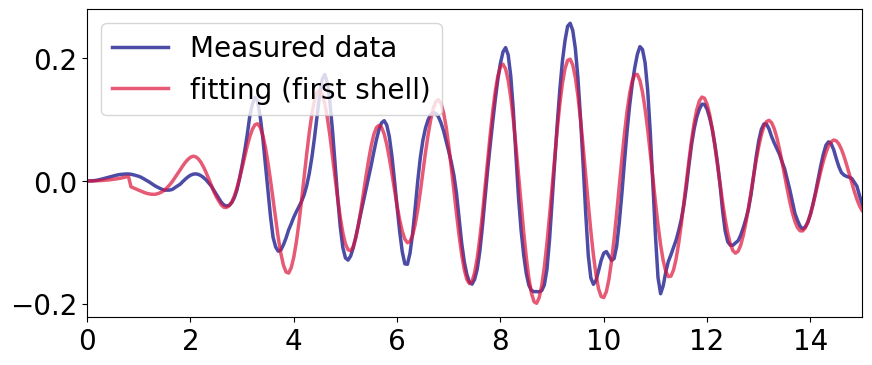

In [13]:
#%%

plt.figure(figsize = (10,4))
plt.plot(fit_k[:,0], fit_k[:,1]/10., color = 'navy', **para)

plt.plot(fit_k[:,0], fit_k[:,2]/10., color = 'crimson', **para)

#plt.ylim(-0.1, 1.2)
plt.xlim(0,15)
plt.legend(['Measured data', 'fitting (first shell)'])
#plt.xlabel('X-ray Energy [eV]')
plt.savefig('fit_K.jpg', dpi = 300)